# Frequency analysis - OddsDepl

Matteo Bortoletto, Clelia Corridori, Filippo Costa, Edoardo Spadetto

Group: Ragù

## Step 1. Find nitrogenous base frequencies

In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq

os.chdir('/home/ubuntu/data')

intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    cutoff = 500
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    
    intr_seqs.append(my_intr_seq)
    
    depl_seqs.append(my_depl_seq)

    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [2]:
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [3]:
kmer = 1

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


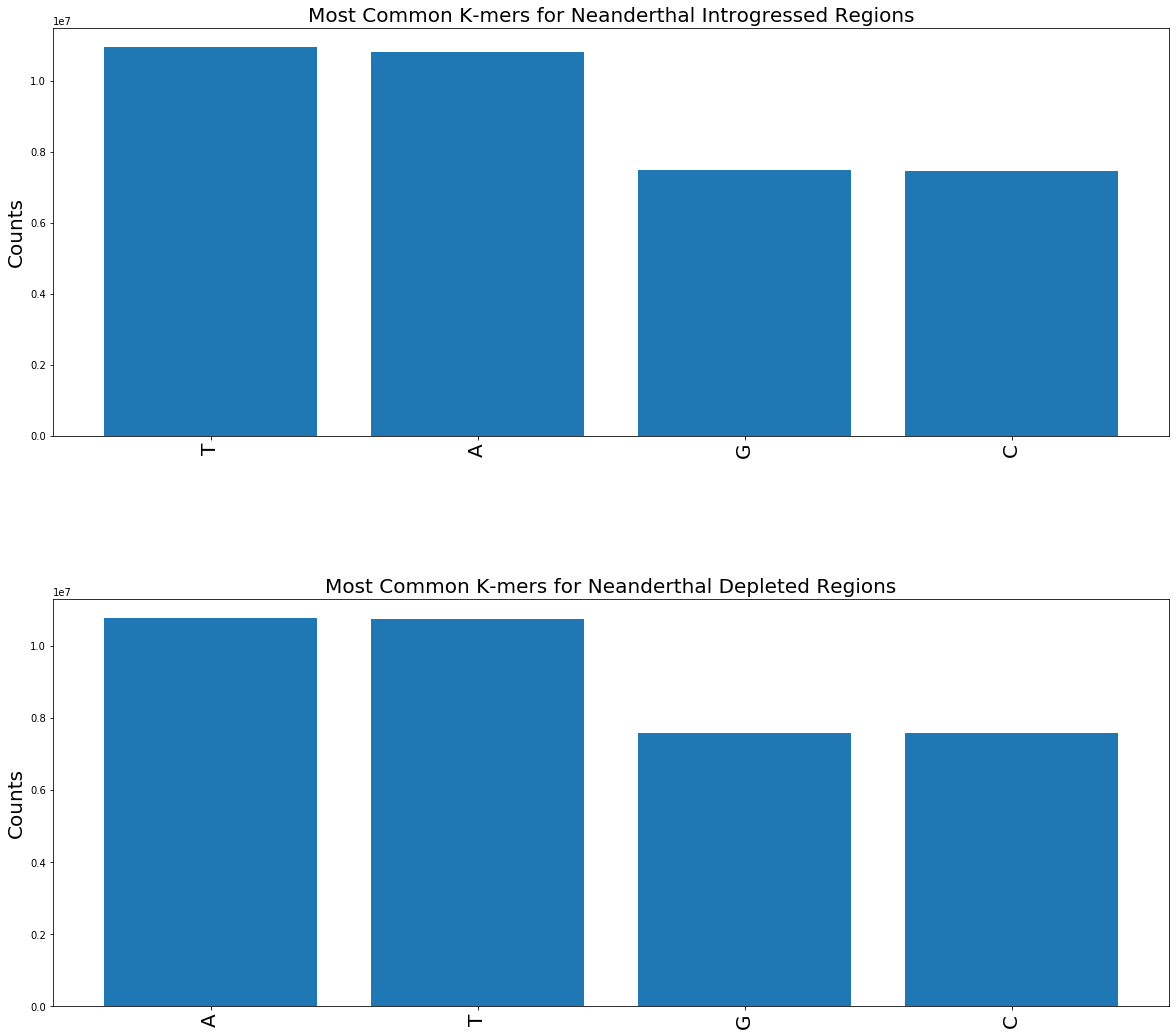

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
D_intr = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_intr)), list(D_intr.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_intr)), list(D_intr.keys()), fontsize = 20)

D_intr_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))

plt.subplot(2, 1, 2)
D_depl = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_depl)), list(D_depl.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_depl)), list(D_depl.keys()), fontsize = 20)

D_depl_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))
               
plt.show()

## Step 2. Find the most predictive words based on frequency

In [5]:
kmer = 10

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


In [6]:
import pandas as pd

intr_counts = dict(Counter([item for sublist in intr_sentences for item in sublist]))
kmers = list(intr_counts.keys())
counts = list(intr_counts.values())
intr_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
intr_df = intr_df.sort_values(['Count'], ascending = False)
intr_df.head(10)

,Kmer,Count
37228,TTTTTTTTTT,37802
24801,AAAAAAAAAA,21204
26794,TGTGTGTGTG,8106
26793,GTGTGTGTGT,8098
8264,CACACACACA,7152
60375,ACACACACAC,7062
26804,ATATATATAT,4771
26803,TATATATATA,4623
18937,TGTAATCCCA,4075
41207,CTTTTTTTTT,4038


In [7]:
depl_counts = dict(Counter([item for sublist in depl_sentences for item in sublist]))
kmers = list(depl_counts.keys())
counts = list(depl_counts.values())
depl_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
depl_df = depl_df.sort_values(['Count'], ascending = False)
depl_df.head(10)

,Kmer,Count
17916,AAAAAAAAAA,39256
1597,TTTTTTTTTT,38250
6814,TGTGTGTGTG,7799
19201,CACACACACA,7679
6815,GTGTGTGTGT,7648
64805,ACACACACAC,7590
3893,TGTAATCCCA,5847
716,ATATATATAT,5807
3895,TAATCCCAGC,5717
717,TATATATATA,5700


In [8]:
import numpy as np
merge_df = pd.merge(intr_df, depl_df, on = 'Kmer')
merge_df.columns = ['Kmer','Count_Intr','Count_Depl']
merge_df['Odds_Depl2Intr'] = merge_df['Count_Depl'] / merge_df['Count_Intr']

In [9]:
sorted_merge_df = merge_df.sort_values(['Odds_Depl2Intr'], ascending = False)
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['Odds_Depl2Intr'])
sorted_merge_df.head(15)

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr,PredictPower
866978,GTGAGGAGCG,1,94,94.0,94.0
910008,CGCATATTCT,1,64,64.0,64.0
911532,CCGCATATTC,1,61,61.0,61.0
840164,TTCCATTCGA,2,114,57.0,57.0
868747,TCCATTCGAG,1,57,57.0,57.0
901742,ATTCGAGTCC,1,56,56.0,56.0
906594,CGCCCCGTCT,1,50,50.0,50.0
876276,GAGCCCGCAT,1,49,49.0,49.0
898557,TAAACTATCG,1,48,48.0,48.0
869067,TGAGATACGT,1,45,45.0,45.0


In [10]:
sorted_merge_df.tail(15)

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr,PredictPower
379501,AGCACCGGTG,34,1,0.029412,0.029412
381979,CGAGTTGGAT,34,1,0.029412,0.029412
374319,CTCCTTTCGC,35,1,0.028571,0.028571
374328,CCTGCGGGTA,35,1,0.028571,0.028571
362436,TATCACGCTT,36,1,0.027778,0.027778
362201,CCGCTTAAGA,36,1,0.027778,0.027778
364765,TTCGAGCCTG,36,1,0.027778,0.027778
360052,CACTCTAACG,36,1,0.027778,0.027778
360112,ATCCTCCGTC,36,1,0.027778,0.027778
366313,AAACGCAAGT,36,1,0.027778,0.027778


In [11]:
import numpy as np

n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:n])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][0:n])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][0:n]/sum(sorted_merge_df["Count_Intr"][0:n]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][0:n]/sum(sorted_merge_df["Count_Depl"][0:n]))
print(rel_freq_depl)

4.441764086582863e-07
2.370791581213603e-05
[0.0625 0.0625 0.0625 0.125  0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625]
[0.11007026 0.07494145 0.07142857 0.13348946 0.06674473 0.06557377
 0.05854801 0.05737705 0.05620609 0.05269321 0.05269321 0.05152225
 0.05152225 0.04918033 0.04800937]


## Step 3. Build the DNA based on the frequencies

In [12]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

The idea is the following:
- choose the total length of the DNA sequence
- generate the right number of important words 
- generate the random DNA
- shuffle 

In [13]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][0:15]), 
                                       p = rel_freq_depl)

In [14]:
DNA_imp_intr

['TTCCATTCGA', 'GAGCCCGCAT', 'ATTCGAGTCC', 'TTCCATTCGA']

In [15]:
print(len(DNA_imp_intr), len(DNA_imp_depl))

4 237


In [16]:
DNAc_intr = [None]*int(len_dna/kmer-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/kmer-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = list(sorted_merge_df['Kmer'][0:15])

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(kmer)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(kmer)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(kmer)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(kmer)

999996
Finished introgressed


In [17]:
print(len(DNAc_intr))
print(len(DNAc_depl))

999996
999763


In [18]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

1000000
1000000
2000000


In [19]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [20]:
print(DNA[0:2])

['CAACTGGAAG GAGCTTATCA AGTGAACCCC AGATTGACGA AGAAAGATCG GCTCTGTACA ATTGGGATGA GAATCGATTG CTTTTTCCTT ATATCGAAGC AACCGACACT GGGTTCTTTG TAACAGACTG AATAGGAGAA AGGTTGCGAC TATTTTAAAA GTTTATAAAC ATCGGAAAAA CACTAATATA TGCGTCTCTT TTTATAAGAG ATTTCTTTCG TTAAAATTAA ATGACATATC ATGAGGAAAC ATTGAGTATC CTGGTGTTAG TAGCTGGGGT CTTCCTGTCT TAATATTCCC ATGTCGTGAT CGTGGGAAAT GCTGTTAACC CGATACCCGG TTTAACATTA TTTATAAGTG TCACACGCCG GTAATGTTGG CCGATATAAA GGACTGTCAC TGGGTTTATA AGTTACTGGT ATTTTTAACT GCAACCCAGC CGAGCCAACA AGCAGCGCGT TCCAGGGACA ATTCTTTTAT GGTTAGATAA ATAACATCTG CATTACCGTT TAAGAGTCAT ATGTCAATCC CTTTGTTTGA ACATCGGTTG GTGTAATAAT CAGTATTCGG GATAAAAACA TTTTTGGCTT GTGTGTGGGA CCACGTAGAG AAGACAAAGT TTATTGAATA ACAGTCGTTG GTACACACCA TTAGCGATTC ACACAAACTT GACGTTGCTT GAAGCTGAAG TAATGATTAC GTATTGTTTC ATTGTGAAAC GCCCGCATTC CTACTATCAT TTATTAAGCT TCAACTAGAT GAAATGTTCC GGGGGTGCAA TGAGAGTCTA AAAGCGATTG AAAACGGCCT GGATGTGAAA AGCGAGTCCG CACATTTGCT TTAGAGCGCA GTTCAGAAAA TATCAAAATT TTGTACATCA GACATGAAAA CTCTTCATAT TATTGTTC

In [21]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [22]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

20000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


## Step 4. LSTM 

In [23]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, LSTM, SimpleRNN, GRU, Bidirectional

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[519436 303472 303473 ... 303493  92354 303494]
 [519449 303495 168875 ...  14642    711  92370]
 [ 92371   4302  92372 ... 303541  26928 168917]
 ...
 [168712 286756  19423 ...  38761 142817 115600]
 [ 60675 516415  52680 ...  81707   5466 115998]
 [272635 184223 807014 ... 518816 149756 243526]]


(20000, 100)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [26]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [27]:
print(X_train.shape)
print(X_test.shape)

(16000, 100)
(4000, 100)


In [28]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
807022


In [29]:
model = Sequential()
model.add(Embedding(vocab_size, 10)) 
model.add(Bidirectional(LSTM(10))) 
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          8070220   
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 8,072,121
Trainable params: 8,072,121
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

Train on 12800 samples, validate on 3200 samples
Epoch 1/5
12800/12800 [==============================] - 31s 2ms/sample - loss: 0.6933 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.4891
Epoch 2/5
12800/12800 [==============================] - 24s 2ms/sample - loss: 0.5461 - accuracy: 0.7531 - val_loss: 0.8205 - val_accuracy: 0.4869
Epoch 3/5
12800/12800 [==============================] - 23s 2ms/sample - loss: 0.0301 - accuracy: 0.9934 - val_loss: 1.5103 - val_accuracy: 0.4831
Epoch 4/5
12800/12800 [==============================] - 22s 2ms/sample - loss: 0.0017 - accuracy: 0.9995 - val_loss: 3.1649 - val_accuracy: 0.4928
Epoch 5/5
12800/12800 [==============================] - 23s 2ms/sample - loss: 1.7386e-06 - accuracy: 1.0000 - val_loss: 6.9268 - val_accuracy: 0.4778


Confusion matrix:
 [[ 347 1634]
 [ 385 1634]]


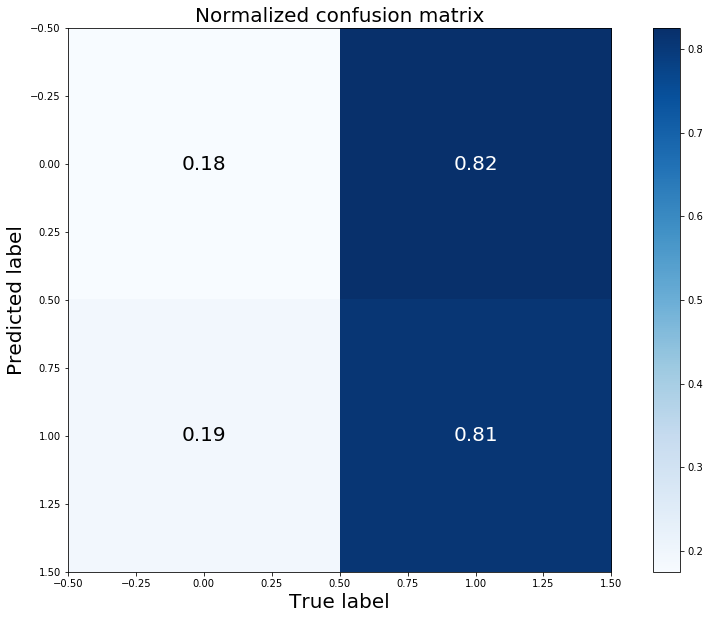

In [31]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [32]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.52%


## Most frequent introgressed = lowest OddsDepl 

In [33]:
n = 15

freq_sort_intr = sum(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:])/sum(list(intr_counts.values()))
print(freq_sort_intr)
freq_sort_depl = sum(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:])/sum(list(depl_counts.values()))
print(freq_sort_depl)
rel_freq_intr = np.array(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:]/sum(sorted_merge_df["Count_Intr"][len(sorted_merge_df["Count_Intr"])-n:]))
print(rel_freq_intr)
rel_freq_depl = np.array(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:]/sum(sorted_merge_df["Count_Depl"][len(sorted_merge_df["Count_Depl"])-n:]))
print(rel_freq_depl)

1.5296325073169735e-05
4.1641538311714344e-07
[0.06170599 0.06170599 0.06352087 0.06352087 0.06533575 0.06533575
 0.06533575 0.06533575 0.06533575 0.06533575 0.06715064 0.06896552
 0.0707804  0.07441016 0.07622505]
[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


In [34]:
import random
import numpy as np

def DNAgen(length):
    return ''.join(np.random.choice(["A", "T", "C", "G"], 
                                    p=[0.294474, 0.298237, 0.203473, 0.203816]) for _ in range(length))

In [35]:
len_dna = 10000000
imp_len_intr = int(freq_sort_intr*len_dna)
imp_len_depl = int(freq_sort_depl*len_dna)
DNA_imp_intr = [None]*imp_len_intr 
DNA_imp_depl = [None]*imp_len_depl

for i in range(imp_len_intr):
    DNA_imp_intr[i] = np.random.choice(list(sorted_merge_df['Kmer'][len(sorted_merge_df["Odds_Depl2Intr"])-n:]), 
                                       p = rel_freq_intr)
    
for i in range(imp_len_depl):
    DNA_imp_depl[i] = np.random.choice(list(sorted_merge_df['Kmer'][len(sorted_merge_df["Odds_Depl2Intr"])-n:]), 
                                       p = rel_freq_depl)

In [36]:
DNAc_intr = [None]*int(len_dna/kmer-len(DNA_imp_intr)) # DNA casuale
DNAc_depl = [None]*int(len_dna/kmer-len(DNA_imp_depl)) # DNA casuale
print(len(DNAc_intr))

words = list(sorted_merge_df['Kmer'][len(sorted_merge_df["Odds_Depl2Intr"])-n:])

for i in range(len(DNAc_intr)):
    DNAc_intr[i] = DNAgen(kmer)
    for w in words:
        while DNAc_intr[i] == w:
            DNAc_intr[i] = DNAgen(kmer)

print("Finished introgressed")
            
for i in range(len(DNAc_depl)):
    DNAc_depl[i] = DNAgen(kmer)
    for w in words:
        while DNAc_depl[i] == w:
            DNAc_depl[i] = DNAgen(kmer)

999848
Finished introgressed


In [37]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

1000000
1000000
2000000


In [38]:
from random import shuffle

DNA_complete_intr = DNA_imp_intr + DNAc_intr
shuffle(DNA_complete_intr)
DNA_complete_depl = DNA_imp_depl + DNAc_depl
shuffle(DNA_complete_depl)
DNA_complete = DNA_complete_intr + DNA_complete_depl

print(len(DNA_complete_intr))
print(len(DNA_complete_depl))
print(len(DNA_complete))

1000000
1000000
2000000


In [39]:
sentence = 100

D = ""
j = 1
c = 0
DNA = [None]*int(len(DNA_complete)/sentence)

for i in DNA_complete:
    D = D + i + " "
    if j%100 == 0:
        DNA[c] = D
        D = ""
        c = c + 1
    j = j + 1

In [40]:
labels = list(np.ones(int(len(DNA)/2))) + list(np.zeros(int(len(DNA)/2)))

In [41]:
print(len(labels))
print(labels[0:5], labels[len(DNA)-5:])

20000
[1.0, 1.0, 1.0, 1.0, 1.0] [0.0, 0.0, 0.0, 0.0, 0.0]


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(DNA)

encoded_docs = tokenizer.texts_to_sequences(DNA)
max_length = max([len(s.split()) for s in DNA])
X = pad_sequences(encoded_docs, maxlen = max_length, padding = 'post')

print(X)
print('\n')
print(X.shape)

[[303797  92446 303798 ...  26970  26971 303821]
 [303822   4346 303823 ...  50037 169407 303847]
 [  8027  92470 169408 ... 169428  92491 303867]
 ...
 [806438 508669 159184 ...  67078 423281 303036]
 [130962 111187  32224 ...  65852 302534 447542]
 [  9181 241393 806463 ... 806478 247891  65879]]


(20000, 100)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.20, random_state = 42)

In [44]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [45]:
print(X_train.shape)
print(X_test.shape)

(16000, 100)
(4000, 100)


In [46]:
max_length = max([len(s.split()) for s in DNA])
print(max_length)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

100
806479


In [47]:
model = Sequential()
model.add(Embedding(vocab_size, 10))
model.add(Bidirectional(LSTM(10))) 
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

epochs = 5
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          8064790   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                1680      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 8,066,691
Trainable params: 8,066,691
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = model.fit(X_train, y_train, 
                    epochs = epochs, verbose = 1, validation_split = 0.2, batch_size = 32, shuffle = True)

Train on 12800 samples, validate on 3200 samples
Epoch 1/5
12800/12800 [==============================] - 26s 2ms/sample - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.4891
Epoch 2/5
12800/12800 [==============================] - 25s 2ms/sample - loss: 0.5590 - accuracy: 0.7531 - val_loss: 0.8088 - val_accuracy: 0.4981
Epoch 3/5
12800/12800 [==============================] - 25s 2ms/sample - loss: 0.0335 - accuracy: 0.9922 - val_loss: 1.4012 - val_accuracy: 0.5088
Epoch 4/5
12800/12800 [==============================] - 24s 2ms/sample - loss: 6.9498e-04 - accuracy: 0.9999 - val_loss: 3.3424 - val_accuracy: 0.5034
Epoch 5/5
12800/12800 [==============================] - 23s 2ms/sample - loss: 2.2145e-06 - accuracy: 1.0000 - val_loss: 5.1210 - val_accuracy: 0.5016


Confusion matrix:
 [[1145  836]
 [1186  833]]


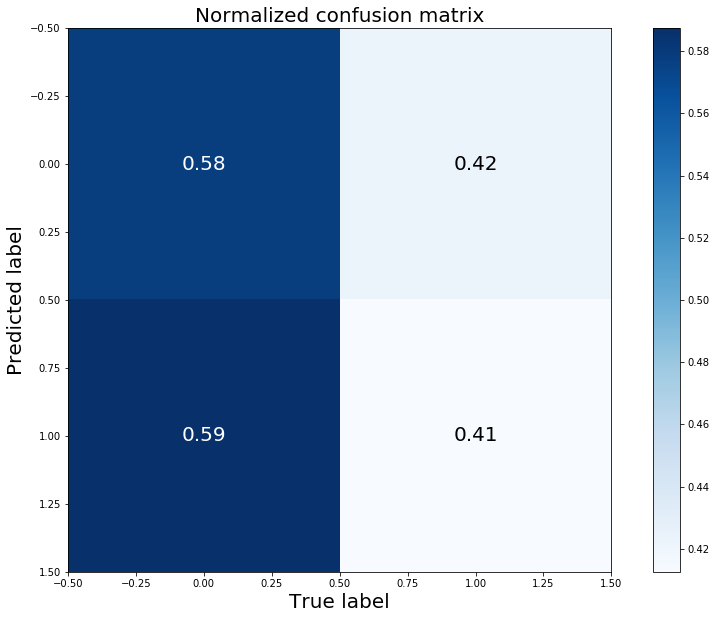

In [49]:
plt.figure(figsize = (15,10))

predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, [np.round(i[0]) for i in predicted_labels])
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix', fontsize = 20)
plt.colorbar()
plt.xlabel('True label', fontsize = 20)
plt.ylabel('Predicted label', fontsize = 20)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center', verticalalignment = 'center', fontsize = 20,
             color='white' if cm[i, j] > 0.5 else 'black')
plt.show()

In [50]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.45%
